In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("investment_data.csv")

In [2]:
data.head(30)

,gender,age,Income,Monthly_Expenditure,Family_Size_and_Dependents,Investment_Avenues,Risk_Tolerance_Level,Mutual_Funds,Equity_Market,Debentures,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,NaN,55000.0,26000.0,2.0,Yes,Low,1,2,5,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23.0,56000.0,27000.0,NaN,Yes,Low,4,3,2,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30.0,57000.0,28000.0,4.0,Yes,Low,3,6,4,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22.0,NaN,29000.0,5.0,Yes,Low,2,1,3,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,NaN,59000.0,NaN,6.0,No,Medium,2,1,3,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet
5,Female,24.0,60000.0,31000.0,2.0,No,Medium,7,5,4,...,1-3 years,Daily,30%-40%,Mutual Fund,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet
6,Female,27.0,61000.0,32000.0,4.0,Yes,Medium,3,6,4,...,3-5 years,Monthly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,High Interest Rates,Financial Consultants
7,Male,21.0,62000.0,33000.0,3.0,Yes,High,2,3,7,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
8,Male,35.0,63000.0,34000.0,NaN,Yes,High,2,4,7,...,1-3 years,Weekly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television
9,Male,31.0,64000.0,35000.0,2.0,Yes,High,1,3,7,...,3-5 years,Monthly,30%-40%,Fixed Deposits,Retirement Plan,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines


In [3]:
#Step 1: Handle missing values

In [4]:
# Check for missing values
print(data.isnull().sum())

gender                               0
age                                  8
Income                               6
Monthly_Expenditure                  6
Family_Size_and_Dependents           8
Investment_Avenues                   0
Risk_Tolerance_Level                 7
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds             

In [5]:
from sklearn.impute import SimpleImputer

# Handle missing values for numerical columns (Age, Income, Monthly_Expenditure, Family_Size_and_Dependents)
numerical_cols = ['age', 'Income', 'Monthly_Expenditure', 'Family_Size_and_Dependents']
imputer = SimpleImputer(strategy='median')  # You can change the strategy to 'mean' or 'most_frequent' as needed
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

In [6]:
print(data.isnull().sum())

gender                               0
age                                  0
Income                               0
Monthly_Expenditure                  0
Family_Size_and_Dependents           0
Investment_Avenues                   0
Risk_Tolerance_Level                 7
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds             

In [7]:
# Handle missing values for categorical column (Risk_Tolerance_Level)
categorical_col = ['Risk_Tolerance_Level']
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_col] = imputer.fit_transform(data[categorical_col])

In [8]:
print(data.isnull().sum())

gender                               0
age                                  0
Income                               0
Monthly_Expenditure                  0
Family_Size_and_Dependents           0
Investment_Avenues                   0
Risk_Tolerance_Level                 0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds             

In [9]:
data.head(5)

,gender,age,Income,Monthly_Expenditure,Family_Size_and_Dependents,Investment_Avenues,Risk_Tolerance_Level,Mutual_Funds,Equity_Market,Debentures,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,27.0,55000.0,26000.0,2.0,Yes,Low,1,2,5,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23.0,56000.0,27000.0,3.0,Yes,Low,4,3,2,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30.0,57000.0,28000.0,4.0,Yes,Low,3,6,4,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22.0,74500.0,29000.0,5.0,Yes,Low,2,1,3,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,27.0,59000.0,45500.0,6.0,No,Medium,2,1,3,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Investment_Avenues', 'Risk_Tolerance_Level', 'Invest_Monitor', 'Expect', 'Avenue']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Normalize numerical features
numerical_cols = ['age', 'Income', 'Monthly_Expenditure', 'Family_Size_and_Dependents']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the first few rows of the preprocessed DataFrame
data.head(44)

,gender,age,Income,Monthly_Expenditure,Family_Size_and_Dependents,Investment_Avenues,Risk_Tolerance_Level,Mutual_Funds,Equity_Market,Debentures,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,-0.133038,-1.825680,-1.813643,-1.207020,1,1,1,2,5,...,1-3 years,1,1,2,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,-1.463418,-1.731694,-1.719182,-0.278543,1,1,4,3,2,...,More than 5 years,2,1,2,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,0.864747,-1.637708,-1.624721,0.649934,1,1,3,6,4,...,3-5 years,0,1,0,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,-1.796013,0.007049,-1.530261,1.578410,1,1,2,1,3,...,Less than 1 year,0,0,0,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,-0.133038,-1.449735,0.028338,2.506887,0,2,2,1,3,...,Less than 1 year,0,1,0,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet
5,Female,-1.130823,-1.355749,-1.341340,-1.207020,0,2,7,5,4,...,1-3 years,0,2,2,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet
6,Female,-0.133038,-1.261763,-1.246879,0.649934,1,2,3,6,4,...,3-5 years,1,1,0,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,High Interest Rates,Financial Consultants
7,Male,-2.128608,-1.167777,-1.152419,-0.278543,1,0,2,3,7,...,3-5 years,1,1,2,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
8,Male,2.527722,-1.073791,-1.057958,-0.278543,1,0,2,4,7,...,1-3 years,2,1,0,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television
9,Male,1.197342,-0.979805,-0.963498,-1.207020,1,0,1,3,7,...,3-5 years,1,2,1,Retirement Plan,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines


   gender   age   Income  Monthly_Expenditure  Family_Size_and_Dependents  \
0  Female   NaN  55000.0              26000.0                         2.0   
1  Female  23.0  56000.0              27000.0                         NaN   
2    Male  30.0  57000.0              28000.0                         4.0   
3    Male  22.0      NaN              29000.0                         5.0   
4  Female   NaN  59000.0                  NaN                         6.0   

  Investment_Avenues Risk_Tolerance_Level  Mutual_Funds  Equity_Market  \
0                Yes                  Low             1              2   
1                Yes                  Low             4              3   
2                Yes                  Low             3              6   
3                Yes                  Low             2              1   
4                 No               Medium             2              1   

   Debentures  ...           Duration  Invest_Monitor   Expect       Avenue  \
0           5

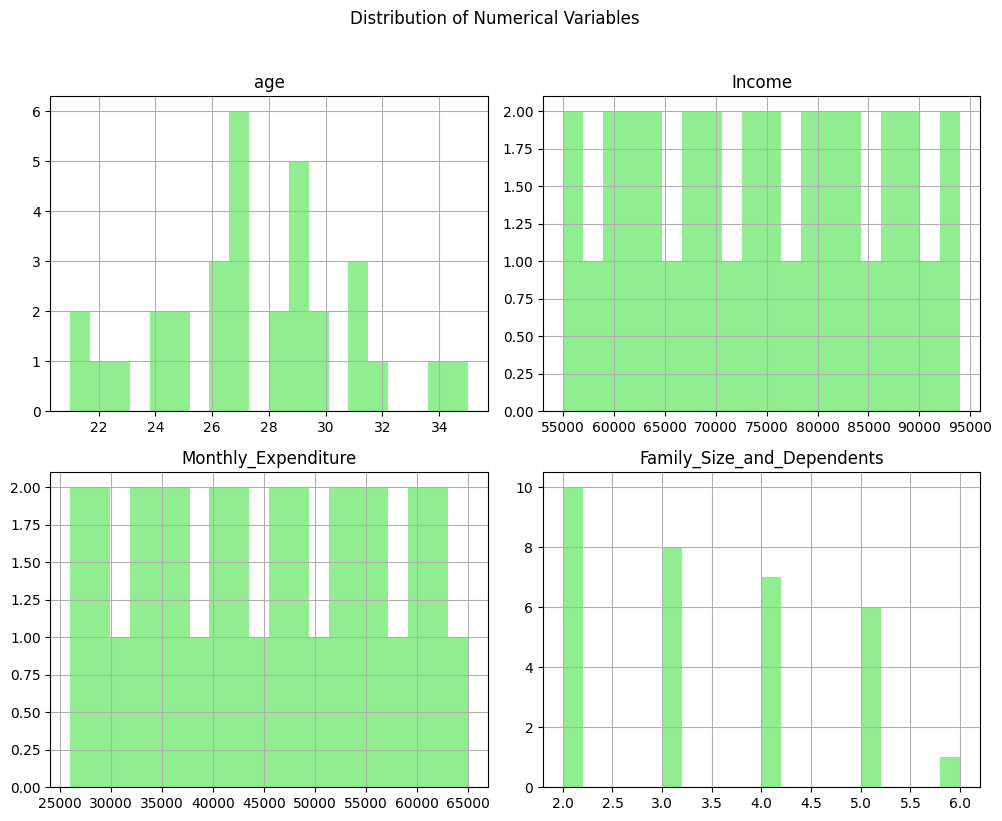

<ipython-input-37-30f9bc98d7f8>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=axes[i//2, i%2], palette='pastel')
<ipython-input-37-30f9bc98d7f8>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=axes[i//2, i%2], palette='pastel')
<ipython-input-37-30f9bc98d7f8>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=axes[i//2, i%2], palette='pastel')
<ipython-input-37-30f9bc98d7f8>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

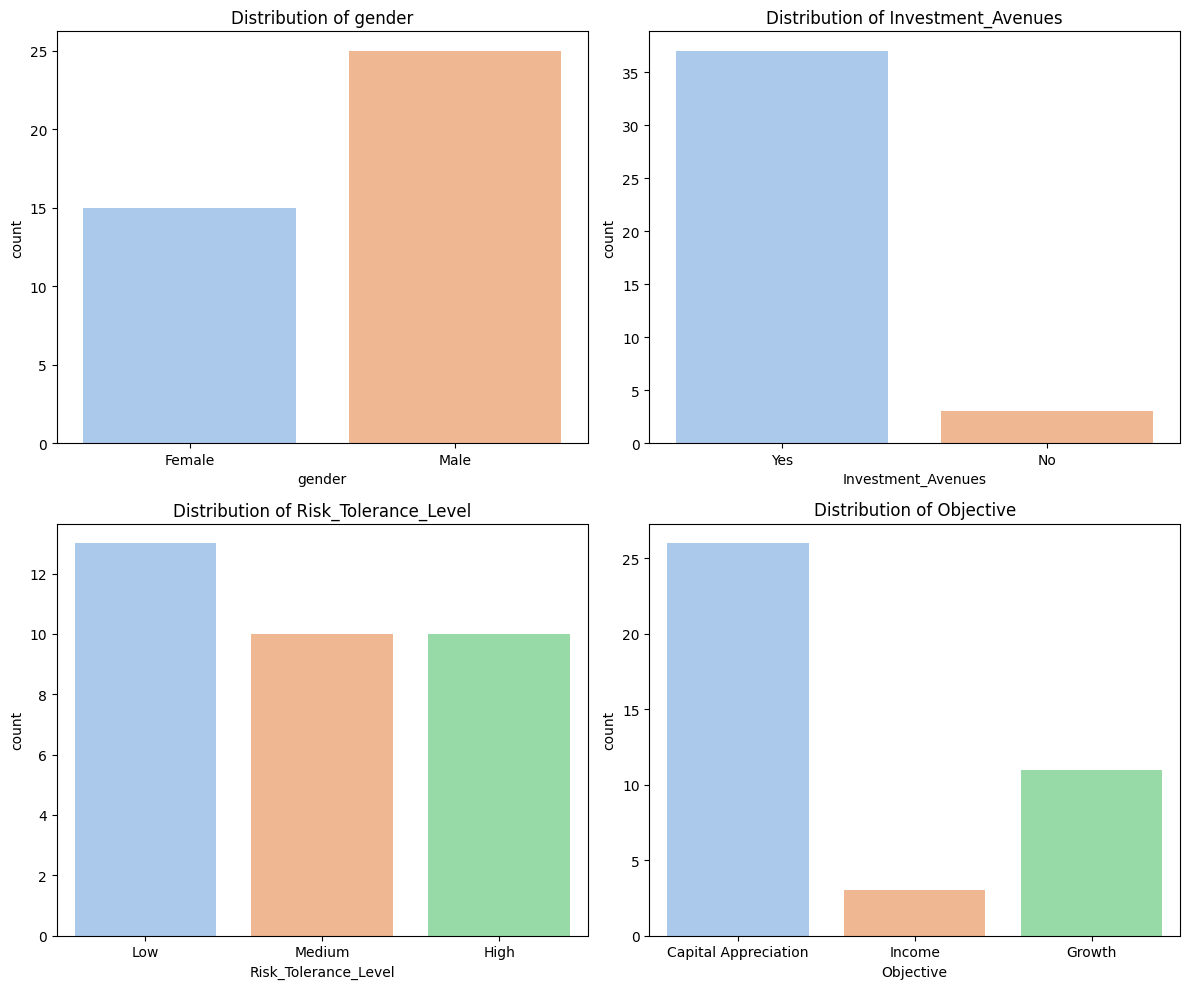

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

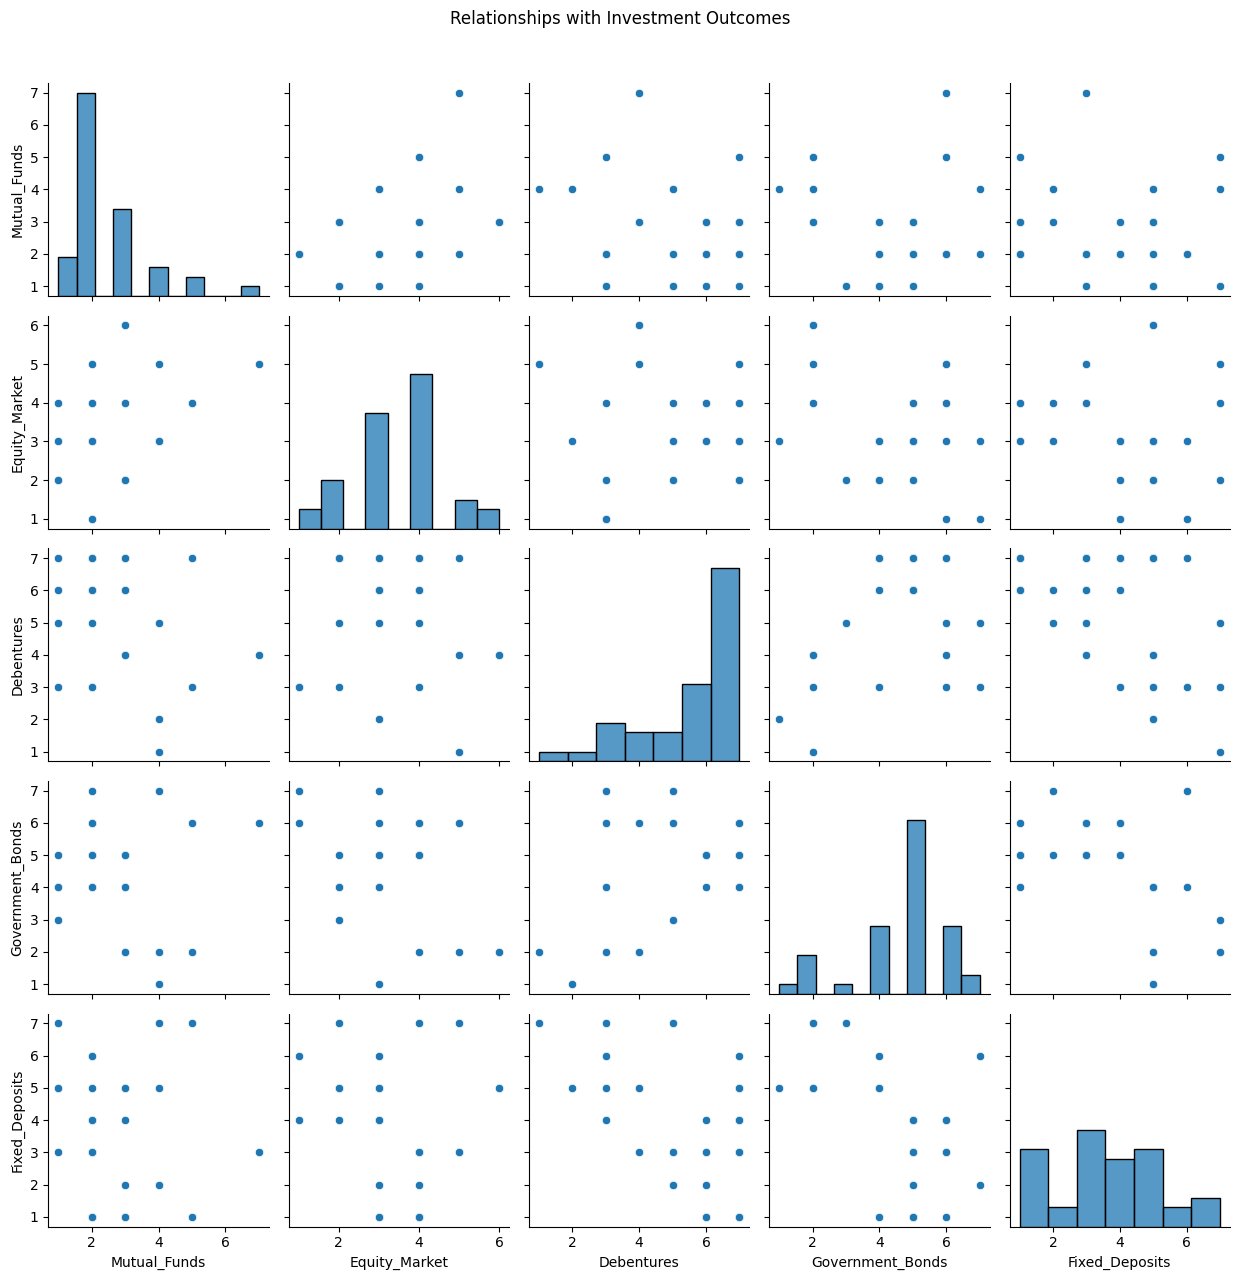

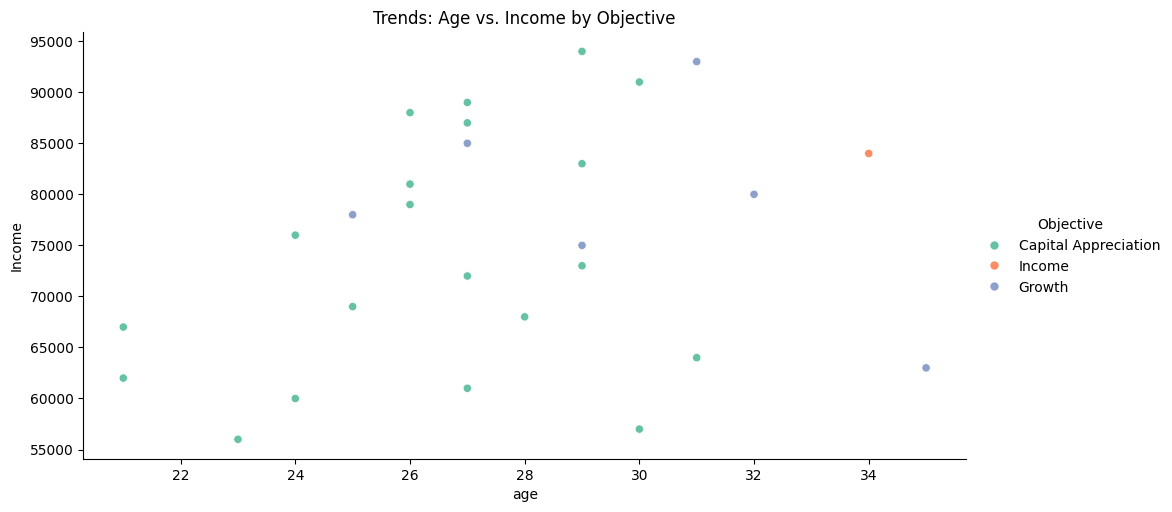

In [37]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('investment_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Explore the distribution of numerical variables
numerical_cols = ['age', 'Income', 'Monthly_Expenditure', 'Family_Size_and_Dependents']
data[numerical_cols].hist(figsize=(10, 8), bins=20, color='lightgreen')
plt.suptitle('Distribution of Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()

# Explore the distribution of categorical variables
categorical_cols = ['gender', 'Investment_Avenues', 'Risk_Tolerance_Level', 'Objective']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=axes[i//2, i%2], palette='pastel')
    axes[i//2, i%2].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Analyze relationships with investment outcomes
investment_cols = ['Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits']
sns.pairplot(data[investment_cols], palette='deep')
plt.suptitle('Relationships with Investment Outcomes', y=1.02)
plt.tight_layout()
plt.show()

# Identify trends and patterns
sns.relplot(x='age', y='Income', hue='Objective', data=data, kind='scatter', aspect=2, palette='Set2')
plt.title('Trends: Age vs. Income by Objective')
plt.show()

# Additional analysis and visualization as needed...

# Interpretation and insights
# Summarize key findings and insights based on the analysis


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("investment_data.csv")

# Drop rows with missing values
data = data.dropna()

# Separate features and target variable
X = data.drop(columns=["Investment_Avenues"])
y = data["Investment_Avenues"]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train different classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("="*50)


Model: Logistic Regression
Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Model: Decision Tree
Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Model: Random Forest
Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("investment_data.csv")

# Drop rows with missing values
data = data.dropna()

# Separate features and target variable
X = data.drop(columns=["Investment_Avenues"])
y = data["Investment_Avenues"]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train different classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("="*50)

# Now, let's predict using a sample input data
# Assume input_df contains the input data
input_df_encoded = pd.get_dummies(input_df)

# Reorder the columns of the input data to match the columns of the training data
input_df_encoded = input_df_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Scale the input features
input_scaled = scaler.transform(input_df_encoded)

# Predict investment options using the trained Random Forest model
predictions = models['Random Forest'].predict(input_scaled)


Model: Logistic Regression
Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Model: Decision Tree
Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Model: Random Forest
Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("investment_data.csv")

# Drop rows with missing values
data = data.dropna()

# Separate features and target variable
X = data.drop(columns=["Investment_Avenues"])
y = data["Investment_Avenues"]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train different classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("="*50)

# Now, let's predict using a sample input data
# Assume input_df contains the input data
input_df_encoded = pd.get_dummies(input_df)

# Reorder the columns of the input data to match the columns of the training data
input_df_encoded = input_df_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Scale the input features
input_scaled = scaler.transform(input_df_encoded)

# Predict investment options using the trained Random Forest model
predictions = models['Random Forest'].predict(input_scaled)


Model: Logistic Regression
Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Model: Decision Tree
Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Model: Random Forest
Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [36]:
# Define a function to predict suitable investment types
def predict_investment(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame(input_data, index=[0])
    # Encode categorical variables
    input_df_encoded = pd.get_dummies(input_df, columns=input_df.columns)
    # Align input data with training data to ensure consistent columns
    input_df_encoded = input_df_encoded.reindex(columns=X_encoded.columns, fill_value=0)
    # Scale the input features using the same scaler used for training data
    input_scaled = scaler.transform(input_df_encoded)
    # Predict investment options using the trained Random Forest model
    predictions = rf_model.predict(input_scaled)
    # Decode the predicted labels back to their original values
    predicted_investment_options = label_encoder.inverse_transform(predictions)

    # Get the corresponding investment types for each predicted option
    investment_types = []
    for col, value in input_data.items():
        if col in ['Mutual_Funds', 'Equity_Market', 'Debentures',
                   'Government_Bonds', 'Fixed_Deposits', 'PPF',
                   'Gold', 'Stock_Market']:
            # Check if the value is numeric
            if str(value[0]).isnumeric():
                # Ensure value is converted to integer before comparison
                if int(value[0]) <= 4:
                    investment_types.append(col)

    return predicted_investment_options, investment_types

# Example input data
input_data = {
    "gender": ["Male"],
    "age": [31],
    "Income": [64000],
    "Monthly_Expenditure": [35000],
    "Family_Size_and_Dependents": [2],
    "Risk_Tolerance_Level": ["High"],
    "Mutual_Funds": [1],
    "Equity_Market": [3],
    "Debentures": [7],
    "Government_Bonds": [4],
    "Fixed_Deposits": [5],
    "PPF": [2],
    "Gold": [6],
    "Stock_Market": ["Yes"],
    "Factor": ["Returns"],
    "Objective": ["Capital Appreciation"],
    "Purpose": ["Wealth Creation"],
    "Duration": ["3-5 years"],
    "Invest_Monitor": ["Monthly"],
    "Expect": ["30%-40%"],
    "Avenue": ["Fixed Deposits"],
    "What are your savings objectives?": ["Retirement Plan"],
    "Reason_Equity": ["Capital Appreciation"],
    "Reason_Mutual": ["Fund Diversification"],
    "Reason_Bonds": ["Assured Returns"],
    "Reason_FD": ["Fixed Returns"],
    "Source": ["Newspapers and Magazines"]
}

# Predict suitable investment types
predicted_investments, investment_types = predict_investment(input_data)
print("Predicted investment:", predicted_investments)
print("Recommended investment types:", investment_types)


Predicted investment: ['Yes']
Recommended investment types: ['Mutual_Funds', 'Equity_Market', 'Government_Bonds', 'PPF']
